In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from numpy.random import seed as random_seed
import random
from os import path
import re

---
## NLP

In [2]:
# Initialization cell for all later generated wordclouds
CHUNK_SIZE = 250
RESULTS_FOLDER = "./results/wordclouds/"

plt.figure(figsize=(12, 10))
# Read the mask image for the wordcloud 
women_mask = np.array(Image.open(r"./data/wordclouds/nyc-logo2.png"))

<Figure size 864x720 with 0 Axes>

In [3]:
# Initilalize spacy analyzer in english
nlp = spacy.load('en_core_web_sm')

In [4]:
# Stopwords removal 
PATH_DATA = './data/wordclouds/'
PATH_STOPWORD = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH_STOPWORD, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud library stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ['//', 'yeah', 'huh', 'yo', 's', 'nt', 'lyric', 'lyrics', 'll']
stopwords = stopwords + add_sw

# Adding default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)

nlp.Defaults.stop_words = stopwords

In [5]:
df = pd.read_csv('./data/lyrics/genius_v3.csv')
df = df.dropna(subset=['lyrics'])
#Sorting by City
df.sort_values(by=['City'], inplace=True)


In [7]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Name,Categories,URL,Years Active Start,Birthdate,Summary,Years Active End,Deathdate,Clip Example YouTube,City,Neighborhood,Coordinates,Lat,Lon,lyrics
48,48,350,Fat Joe,rapper,https://en.wikipedia.org/wiki/Fat_Joe,1992.0,1970-08-19,"Joseph Antonio Cartagena (born August 19, 1970...",NaN,NaN,https://www.youtube.com/embed/KsUCWtxvBis,Bronx,Forest House Projects,"40.824931,-73.903587",40.824931,-73.903587,"[""What’s Luv? Lyrics[Intro: Fat Joe & Ashanti]..."
30,30,228,Afrika Bambaataa,producer / dj,https://en.wikipedia.org/wiki/Afrika_Bambaataa,NaN,1957-04-17,"frika Bambaataa (born April 17, 1957) is an Am...",NaN,NaN,https://www.youtube.com/embed/hh1AypBaIEk,Bronx,Bronx River Houses,"40.835033,-73.876652",40.835033,-73.876652,['Zulu Nation Throwdown LyricsSay what\'s the ...
42,42,307,KRS-One,rapper,https://en.wikipedia.org/wiki/KRS-One,NaN,NaN,"Lawrence Parker (born August 20, 1965), better...",NaN,NaN,https://www.youtube.com/embed/9ZrAYxWPN6c,Bronx,South Bronx,"40.819778,-73.916222",40.819778,-73.916222,['Sound of da Police Lyrics[Produced by Showbi...
79,79,511,Masta Killa,rapper,https://en.wikipedia.org/wiki/Masta_Killa,NaN,1969-08-18,"Jamel Irief (born Elgin Turner; August 18, 196...",NaN,NaN,https://www.youtube.com/embed/QZ5Rbla6jJA,Brooklyn,East New York,"40.663512,-73.884644",40.663512,-73.884644,['Old Man Lyrics[Intro: Ol\' Dirty Bastard]\nI...
31,31,229,U-God,rapper,https://en.wikipedia.org/wiki/U-God,NaN,NaN,"Lamont Jody Hawkins (born October 11, 1970), b...",NaN,NaN,https://www.youtube.com/embed/oFXEqUDmkgQ,Brooklyn,Brownsville,"40.665087,-73.907668",40.665087,-73.907668,"[""Wu-Tang Lyrics[Hook: U-God]\nYou ain't heard..."


In [8]:
def violet_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    '''
    Function to change colour of word cloud
    '''
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))


In [18]:
neighborhoods = df.City.unique()
neighborhoods

df[df['City'] == 'East Orange']

,Unnamed: 0,Unnamed: 0.1,Name,Categories,URL,Years Active Start,Birthdate,Summary,Years Active End,Deathdate,Clip Example YouTube,City,Neighborhood,Coordinates,Lat,Lon,lyrics
37,37,288,Queen Latifah,rapper;singer,https://en.wikipedia.org/wiki/Queen_Latifah,NaN,1970-03-18,"Dana Elaine Owens (born March 18, 1970), known...",NaN,NaN,https://www.youtube.com/embed/f8cHxydDb7o,East Orange,NaN,"40.765586,-74.213075",40.765586,-74.213075,"['U.N.I.T.Y. Lyrics[Intro]\nUh, U.N.I.T.Y., U...."
35,35,280,Naughty by Nature,group,https://en.wikipedia.org/wiki/Naughty_by_Nature,1988.0,NaN,Naughty by Nature is a Grammy Award-winning Am...,2002.0,NaN,https://www.youtube.com/embed/6xGuGSDsDrM,East Orange,NaN,"40.757701,-74.213997",40.757701,-74.213997,['O.P.P. Lyrics[Intro: Treach]\nArm me with ha...


In [17]:
neighborhoods

array(['Bronx', 'Brooklyn', 'East Orange', 'Englewood', 'Harlem',
       'Hollis', 'Jersey City', 'Long Island', 'New York', 'Newark',
       'Paterson', 'Queens', 'South Orange', 'St Albans', 'Stapleton',
       'Staten Island', 'Yonkers'], dtype=object)

In [20]:
THRSH = 15
#One wordcloud per neighborhoods
for nbhood in neighborhoods:
    tmp = df[df.City==nbhood]
    
    words = []
    i=0
    #Creating a list of all words in all songs
    for song in tmp.lyrics:
        print(f'Artist #{i}')
        i += 1
        #Cleaning lyrics
        song = song.replace('\\n', ' ')
        song = song.replace("\'", '')
        song = song.replace("\\", '')
        song = re.sub("[\(\[].*?[\)\]]", "", song)

        song = song.lower()

        # Remove words shorter than 3 characters
        new_text = ' '.join([w for w in song.split() if len(w)>2])   

        # Creating a spacy object
        doc = nlp(new_text)
        # Tokenizer
        tokens = [token.text for token in doc]
        # Lemmatization
        # removing stop words and lematize
        words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']

    #Generate the wordcloud
    RESULTS_FOLDER = './results/wordclouds/'
    text_wordcloud = ""
    text_wordcloud = ' '.join(word for word in words)

    wc = WordCloud( background_color="white", max_words=500, mask=women_mask,
                stopwords=stopwords, max_font_size=40, random_state=1,height=100,width=100,collocation_threshold=THRSH).generate(text_wordcloud)

    # Store to file
    wc.to_file(path.join(RESULTS_FOLDER, f"{nbhood}_thresh{THRSH}.png"))

    print(f'{nbhood} wordcloud figure saved \n')



Artist #0
Artist #1
Artist #2
Bronx wordcloud figure saved 

Artist #0
Artist #1
Artist #2
Artist #3
Artist #4
Artist #5
Artist #6
Artist #7
Artist #8
Artist #9
Artist #10
Artist #11
Brooklyn wordcloud figure saved 

Artist #0
Artist #1
East Orange wordcloud figure saved 

Artist #0
Englewood wordcloud figure saved 

Artist #0
Harlem wordcloud figure saved 

Artist #0
Hollis wordcloud figure saved 

Artist #0
Jersey City wordcloud figure saved 

Artist #0
Artist #1
Artist #2
Artist #3
Artist #4
Artist #5
Long Island wordcloud figure saved 

Artist #0
Artist #1
Artist #2
Artist #3
Artist #4
Artist #5
Artist #6
Artist #7
Artist #8
Artist #9
Artist #10
Artist #11
Artist #12
Artist #13
Artist #14
Artist #15
Artist #16
Artist #17
Artist #18
Artist #19
Artist #20
Artist #21
Artist #22
Artist #23
Artist #24
Artist #25
Artist #26
Artist #27
Artist #28
Artist #29
Artist #30
Artist #31
Artist #32
Artist #33
Artist #34
Artist #35
Artist #36
Artist #37
New York wordcloud figure saved 

Artist #0
A

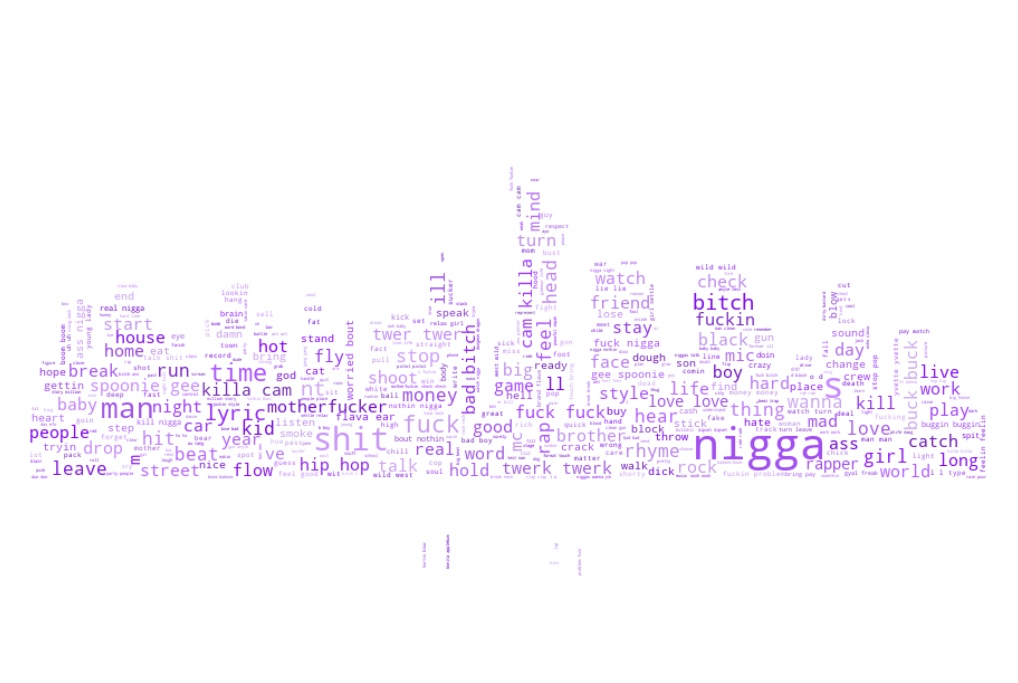

In [34]:
plt.figure(figsize=(18, 18))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

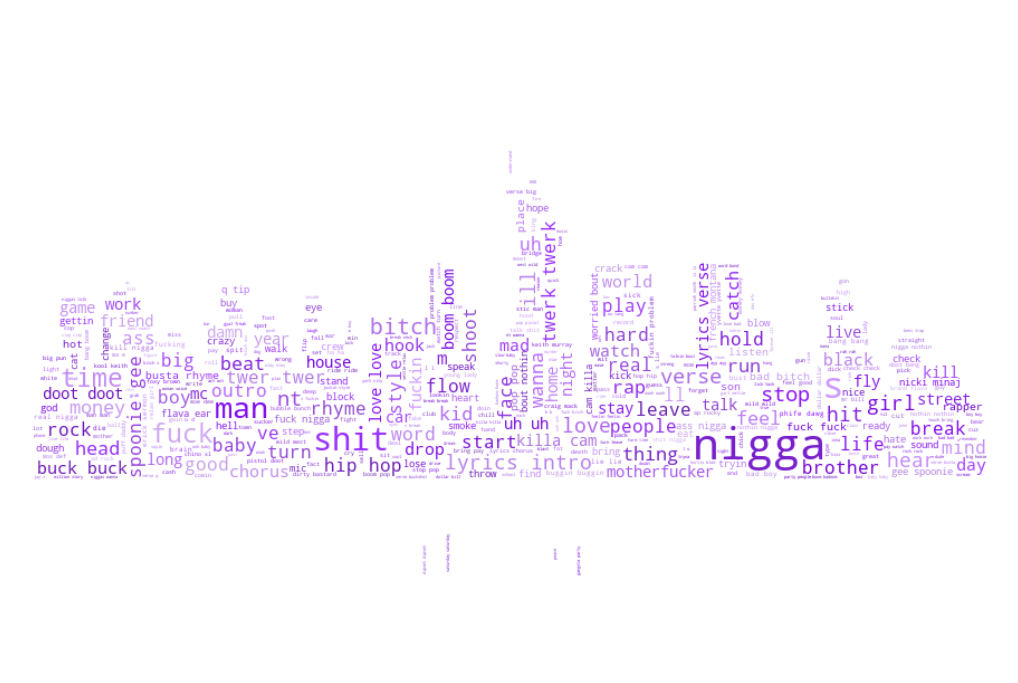

In [28]:
plt.figure(figsize=(18, 18))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

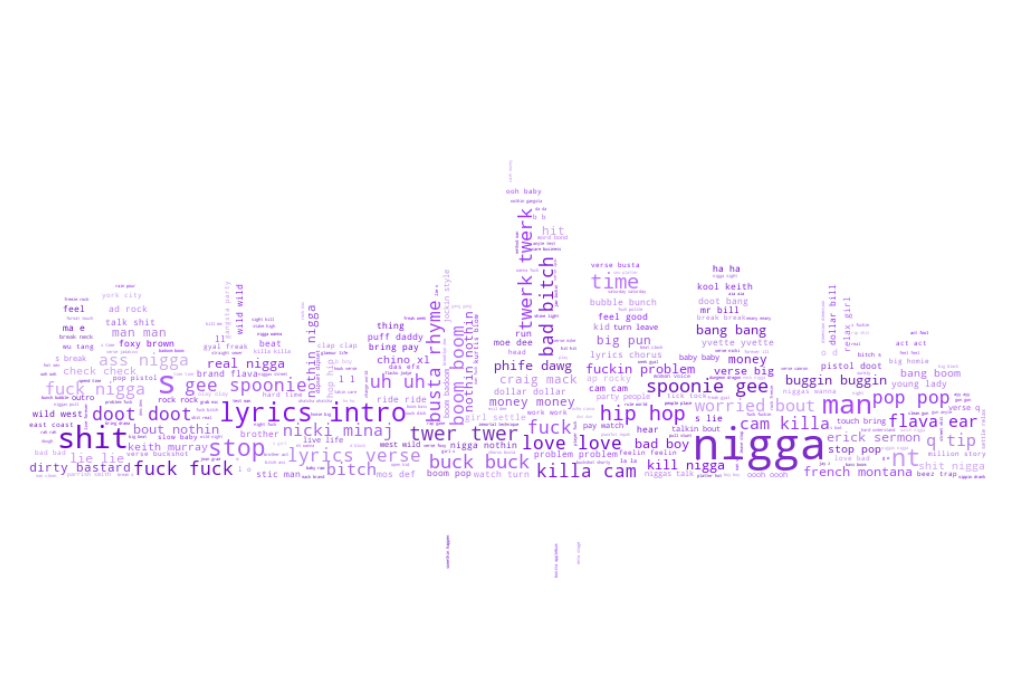

In [26]:
plt.figure(figsize=(18, 18))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
df[df.City=='Bronx']

,Unnamed: 0,Unnamed: 0.1,Name,Categories,URL,Years Active Start,Birthdate,Summary,Years Active End,Deathdate,Clip Example YouTube,City,Neighborhood,Coordinates,Lat,Lon,lyrics
48,48,350,Fat Joe,rapper,https://en.wikipedia.org/wiki/Fat_Joe,1992.0,1970-08-19,"Joseph Antonio Cartagena (born August 19, 1970...",NaN,NaN,https://www.youtube.com/embed/KsUCWtxvBis,Bronx,Forest House Projects,"40.824931,-73.903587",40.824931,-73.903587,"[""What’s Luv? Lyrics[Intro: Fat Joe & Ashanti]..."
30,30,228,Afrika Bambaataa,producer / dj,https://en.wikipedia.org/wiki/Afrika_Bambaataa,NaN,1957-04-17,"frika Bambaataa (born April 17, 1957) is an Am...",NaN,NaN,https://www.youtube.com/embed/hh1AypBaIEk,Bronx,Bronx River Houses,"40.835033,-73.876652",40.835033,-73.876652,['Zulu Nation Throwdown LyricsSay what\'s the ...
42,42,307,KRS-One,rapper,https://en.wikipedia.org/wiki/KRS-One,NaN,NaN,"Lawrence Parker (born August 20, 1965), better...",NaN,NaN,https://www.youtube.com/embed/9ZrAYxWPN6c,Bronx,South Bronx,"40.819778,-73.916222",40.819778,-73.916222,['Sound of da Police Lyrics[Produced by Showbi...
